#### 问题要求
1. 按照宠物类型分析欧美等海外国家宠物行业发展
2. 预测未来3年全球宠物食品需求

#### 解决方案
##### 问题1：

**假设二** ：用美国、法国、德国代表海外国家，通过这三个国家的宠物行业发展折射海外国家的宠物行业发展情况。 \
**假设三**：欧元兑美元汇率1.1。 \
\
三国评价指标：
1. 宠物行业市场规模（亿美元/亿欧元） 0.4
2. 宠物家庭户数渗透率（%） 0.3
3. 宠物行业总支出（亿美元/亿欧元）0.3

-> 堆叠柱状图展示猫和狗数量变化和结构占比，折线图展示变化率，将三个国家用多柱状图并排全部画在一张图里。\
-> 分三个国家，结合三个指标构建宠物行业综合评价体系，按加权计算行业发展得分，按猫和狗分别分析两个宠物类型的市场发展。

##### 问题2：
引入2010至2023年全球宠物食品销售额（十亿美元）作为全球宠物食品需求，以此预测未来3年全球宠物食品的需求量。


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取三国数据
usa_data = pd.read_excel('./data/attachment2_America.xlsx')

fra_data = pd.read_excel('./data/attachment2_France.xlsx')

ger_data = pd.read_excel('./data/attachment2_Germany.xlsx')

usa_data

,Year,Cat,Dog,Household Penetration Rate,Total expenditures in the pet industry,Market Size
0,2019,9420,8970,0.67,957,753.8
1,2020,6500,8500,0.70,1036,1036.0
2,2021,9420,8970,0.70,1236,1236.0
3,2022,7380,8970,0.66,1368,1300.0
4,2023,7380,8010,0.85,1470,1470.0


In [2]:
usa_data['Year']

0    2019
1    2020
2    2021
3    2022
4    2023
Name: Year, dtype: int64

### 1. 堆叠柱状图+折线图

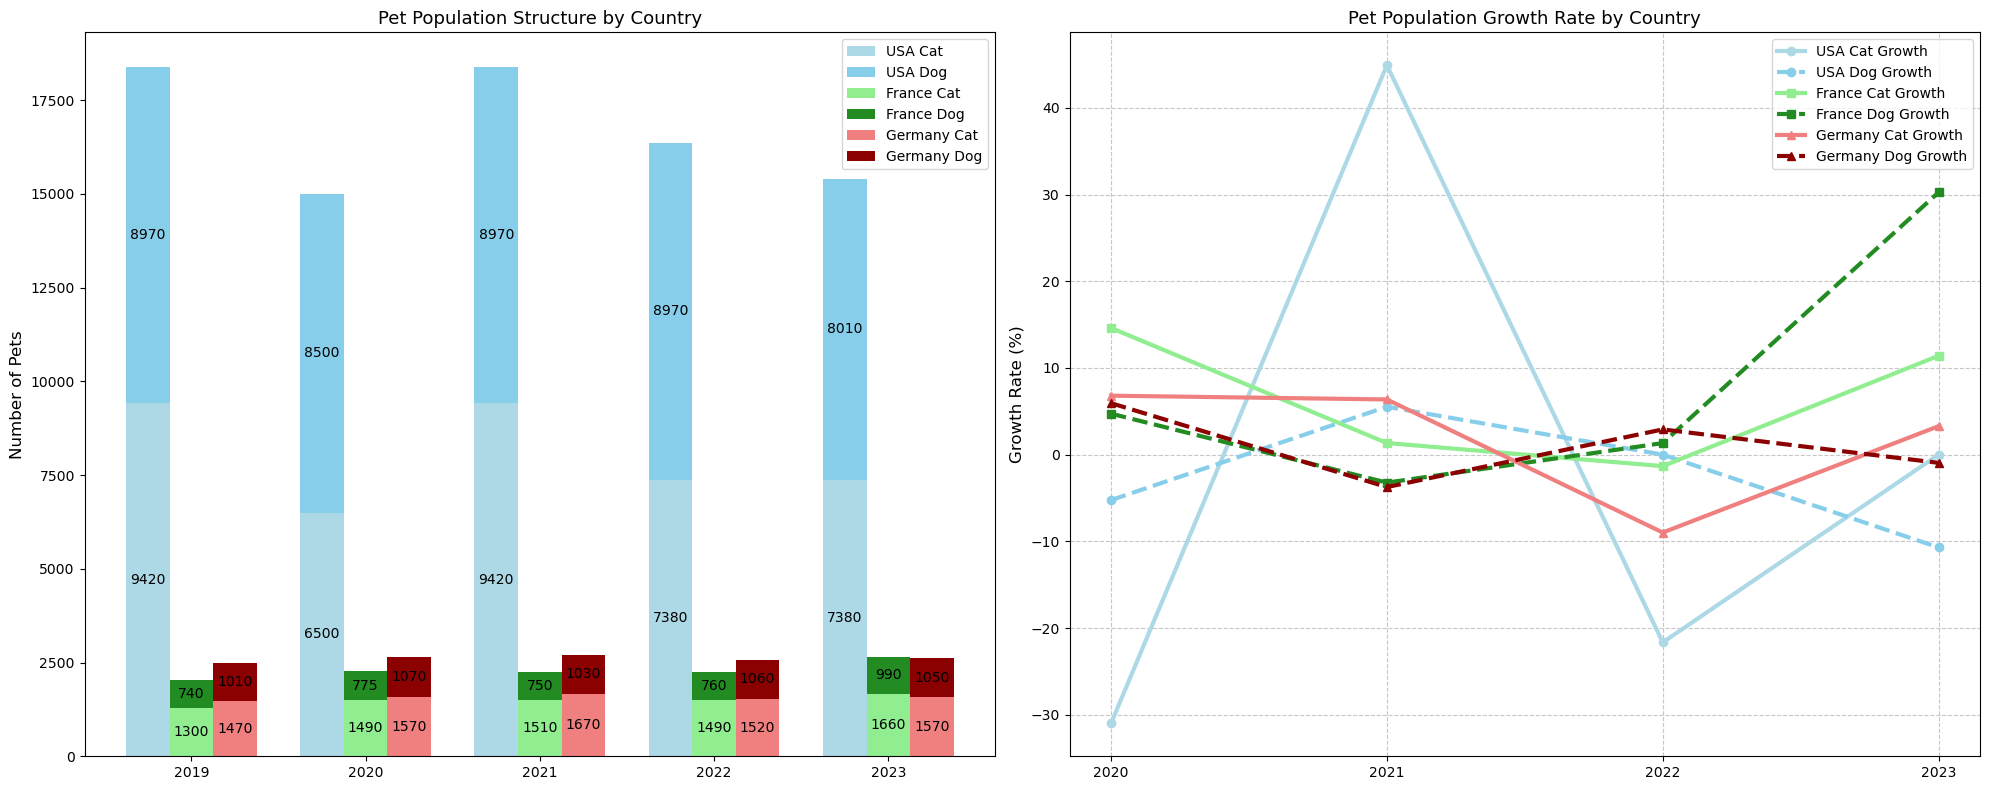


各国猫狗数量年度变化率:

USA猫增长率: ['-31.00%', '44.92%', '-21.66%', '0.00%']
USA狗增长率: ['-5.24%', '5.53%', '0.00%', '-10.70%']

France猫增长率: ['14.62%', '1.34%', '-1.32%', '11.41%']
France狗增长率: ['4.73%', '-3.23%', '1.33%', '30.26%']

Germany猫增长率: ['6.80%', '6.37%', '-8.98%', '3.29%']
Germany狗增长率: ['5.94%', '-3.74%', '2.91%', '-0.94%']


In [3]:

# 创建并排的两个子图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# 设置柱状图的宽度和位置
bar_width = 0.25
years = usa_data['Year']
r1 = np.arange(len(years))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# 第一个子图：绘制堆叠柱状图
# 美国数据
usa_cats = ax1.bar(r1, usa_data['Cat'], bar_width, label='USA Cat', color='lightblue')
usa_dogs = ax1.bar(r1, usa_data['Dog'], bar_width, bottom=usa_data['Cat'], label='USA Dog', color='skyblue')

# 法国数据
fra_cats = ax1.bar(r2, fra_data['Cat'], bar_width, label='France Cat', color='lightgreen')
fra_dogs = ax1.bar(r2, fra_data['Dog'], bar_width, bottom=fra_data['Cat'], label='France Dog', color='forestgreen')

# 德国数据
ger_cats = ax1.bar(r3, ger_data['Cat'], bar_width, label='Germany Cat', color='lightcoral')
ger_dogs = ax1.bar(r3, ger_data['Dog'], bar_width, bottom=ger_data['Cat'], label='Germany Dog', color='darkred')

# 添加数值标签
def add_labels(ax, bars, bottoms=None):
    for i, bar in enumerate(bars):
        height = bar.get_height()
        if bottoms is not None:
            y_pos = bottoms[i] + height/2
        else:
            y_pos = height/2
        ax.text(bar.get_x() + bar.get_width()/2., y_pos,
                f'{int(height)}',
                ha='center', va='center', fontsize=10)

# 为每组柱状图添加标签
add_labels(ax1, usa_cats)
add_labels(ax1, usa_dogs, usa_data['Cat'].values)
add_labels(ax1, fra_cats)
add_labels(ax1, fra_dogs, fra_data['Cat'].values)
add_labels(ax1, ger_cats)
add_labels(ax1, ger_dogs, ger_data['Cat'].values)

# 设置第一个子图的标签和标题
ax1.set_xticks([r + bar_width for r in range(len(years))])
ax1.set_xticklabels(years)
ax1.set_ylabel('Number of Pets', fontsize=12)
ax1.set_title('Pet Population Structure by Country', fontsize=13)
ax1.legend(loc='upper right')

# 第二个子图：绘制增长率折线图
# 计算猫和狗的分别增长率
def calculate_growth_rate(data):
    return [(data.iloc[i] - data.iloc[i-1])/data.iloc[i-1] * 100 for i in range(1, len(data))]

# 计算各国猫和狗的增长率
usa_cat_growth = calculate_growth_rate(usa_data['Cat'])
usa_dog_growth = calculate_growth_rate(usa_data['Dog'])
fra_cat_growth = calculate_growth_rate(fra_data['Cat'])
fra_dog_growth = calculate_growth_rate(fra_data['Dog'])
ger_cat_growth = calculate_growth_rate(ger_data['Cat'])
ger_dog_growth = calculate_growth_rate(ger_data['Dog'])

# 绘制增长率折线图
years_growth = years[1:]
ax2.plot(years_growth, usa_cat_growth, 'o-', label='USA Cat Growth', color='lightblue', linewidth=3)
ax2.plot(years_growth, usa_dog_growth, 'o--', label='USA Dog Growth', color='skyblue', linewidth=3)
ax2.plot(years_growth, fra_cat_growth, 's-', label='France Cat Growth', color='lightgreen', linewidth=3)
ax2.plot(years_growth, fra_dog_growth, 's--', label='France Dog Growth', color='forestgreen', linewidth=3)
ax2.plot(years_growth, ger_cat_growth, '^-', label='Germany Cat Growth', color='lightcoral', linewidth=3)
ax2.plot(years_growth, ger_dog_growth, '^--', label='Germany Dog Growth', color='darkred', linewidth=3)

# 设置第二个子图的标签和标题
ax2.set_xticks([2020,2021,2022,2023])
ax2.set_ylabel('Growth Rate (%)', fontsize=12)
ax2.set_title('Pet Population Growth Rate by Country', fontsize=13)
ax2.legend(loc='upper right')
ax2.grid(True, linestyle='--', alpha=0.7)


# 调整布局
plt.tight_layout()
plt.show()

# 打印增长率数据
print("\n各国猫狗数量年度变化率:")
print("\nUSA猫增长率:", [f"{x:.2f}%" for x in usa_cat_growth])
print("USA狗增长率:", [f"{x:.2f}%" for x in usa_dog_growth])
print("\nFrance猫增长率:", [f"{x:.2f}%" for x in fra_cat_growth])
print("France狗增长率:", [f"{x:.2f}%" for x in fra_dog_growth])
print("\nGermany猫增长率:", [f"{x:.2f}%" for x in ger_cat_growth])
print("Germany狗增长率:", [f"{x:.2f}%" for x in ger_dog_growth])



### 2.综合评价三国发展

In [4]:
# 统一货币单位
exchange_rate = 1.1  # 欧元兑美元汇率
for df in [fra_data, ger_data]:
    df['Market Size'] = df['Market Size'] * exchange_rate
    df['Total expenditures in the pet industry'] = df['Total expenditures in the pet industry'] * exchange_rate

In [5]:
# 合并数据
all_data = pd.concat([usa_data, fra_data, ger_data], keys=['USA', 'France', 'Germany'])
all_data

Year   Cat   Dog  Household Penetration Rate  \
USA     0  2019  9420  8970                        0.67   
        1  2020  6500  8500                        0.70   
        2  2021  9420  8970                        0.70   
        3  2022  7380  8970                        0.66   
        4  2023  7380  8010                        0.85   
France  0  2019  1300   740                        0.35   
        1  2020  1490   775                        0.40   
        2  2021  1510   750                        0.46   
        3  2022  1490   760                        0.46   
        4  2023  1660   990                        0.50   
Germany 0  2019  1470  1010                        0.45   
        1  2020  1570  1070                        0.47   
        2  2021  1670  1030                        0.46   
        3  2022  1520  1060                        0.46   
        4  2023  1570  1050                        0.45   

           Total expenditures in the pet industry  Market Size  
USA     0                                 957.000      753.800  
        1                                1036.000     1036.000  
        2                                1236.000     1236.000  
        3                                1368.000     1300.000  
        4                                1470.000     1470.000  
France  0                                  52.800       53.900  
        1                                  53.900       52.800  
        2                                  53.900       53.900  
        3                                  46.200       63.800  
        4                                  51.700       64.900  
Germany 0                                  56.705       56.705  
        1                                  49.643       49.643  
        2                                  66.000       49.643  
        3                                  71.500       71.500  
        4                                  77.000       77.000

In [6]:
# 标准化处理函数
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

# 计算综合得分
def calculate_composite_score(data):
    
    # 标准化三个指标
    norm_market_size = normalize(data['Market Size'])
    norm_penetration_rate = normalize(data['Household Penetration Rate'])
    norm_expenditure = normalize(data['Total expenditures in the pet industry'])

    # 计算综合得分
    weights = {'market_size': 0.4, 'penetration_rate': 0.3, 'expenditure': 0.3}
    data['Composite Score'] = (
        norm_market_size * weights['market_size'] +
        norm_penetration_rate * weights['penetration_rate'] +
        norm_expenditure * weights['expenditure']
    )
    
    # 按年份分组计算市场份额
    yearly_totals = data.groupby('Year').agg({
        'Cat': 'sum',
        'Dog': 'sum'
    })
    
    # 计算每个国家在每年的市场份额
    for year in data['Year'].unique():
        year_mask = data['Year'] == year
        total_cats = yearly_totals.loc[year, 'Cat']
        total_dogs = yearly_totals.loc[year, 'Dog']
        
        data.loc[year_mask, 'Cat Market Share'] = data.loc[year_mask, 'Cat'] / total_cats
        data.loc[year_mask, 'Dog Market Share'] = data.loc[year_mask, 'Dog'] / total_dogs

    return data

# 计算得分
all_scores = calculate_composite_score(all_data)

# 查看结果
all_scores

Year   Cat   Dog  Household Penetration Rate  \
USA     0  2019  9420  8970                        0.67   
        1  2020  6500  8500                        0.70   
        2  2021  9420  8970                        0.70   
        3  2022  7380  8970                        0.66   
        4  2023  7380  8010                        0.85   
France  0  2019  1300   740                        0.35   
        1  2020  1490   775                        0.40   
        2  2021  1510   750                        0.46   
        3  2022  1490   760                        0.46   
        4  2023  1660   990                        0.50   
Germany 0  2019  1470  1010                        0.45   
        1  2020  1570  1070                        0.47   
        2  2021  1670  1030                        0.46   
        3  2022  1520  1060                        0.46   
        4  2023  1570  1050                        0.45   

           Total expenditures in the pet industry  Market Size  \
USA     0                                 957.000      753.800   
        1                                1036.000     1036.000   
        2                                1236.000     1236.000   
        3                                1368.000     1300.000   
        4                                1470.000     1470.000   
France  0                                  52.800       53.900   
        1                                  53.900       52.800   
        2                                  53.900       53.900   
        3                                  46.200       63.800   
        4                                  51.700       64.900   
Germany 0                                  56.705       56.705   
        1                                  49.643       49.643   
        2                                  66.000       49.643   
        3                                  71.500       71.500   
        4                                  77.000       77.000   

           Composite Score  Cat Market Share  Dog Market Share  
USA     0         0.582213          0.772765          0.836754  
        1         0.696332          0.679916          0.821653  
        2         0.794796          0.747619          0.834419  
        3         0.816633          0.710298          0.831325  
        4         1.000000          0.695570          0.797015  
France  0         0.002589          0.106645          0.069030  
        1         0.032511          0.155858          0.074915  
        2         0.068821          0.119841          0.069767  
        3         0.069987          0.143407          0.070436  
        4         0.095456          0.156456          0.098507  
Germany 0         0.064202          0.120591          0.094216  
        1         0.072725          0.164226          0.103432  
        2         0.070172          0.132540          0.095814  
        3         0.077486          0.146295          0.098239  
        4         0.074194          0.147974          0.104478

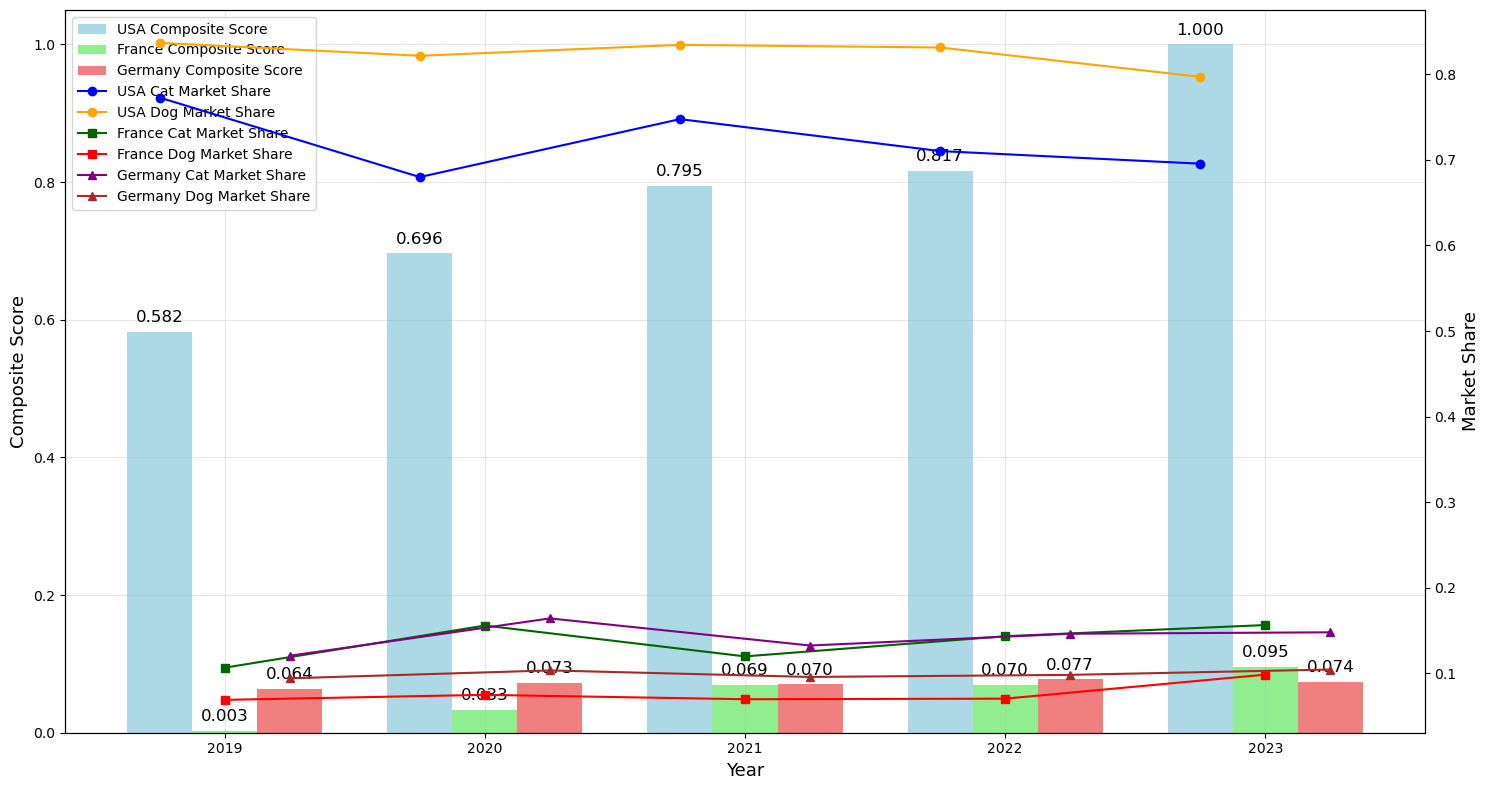

In [7]:
# 从all_scores中提取各国数据
usa_scores = all_scores.xs('USA')
fra_scores = all_scores.xs('France')
ger_scores = all_scores.xs('Germany')

# 设置图形
fig, ax1 = plt.subplots(figsize=(15, 8))

# 设置柱状图的宽度和位置
bar_width = 0.25
r1 = np.arange(len(usa_scores))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# 绘制综合得分的柱状图
bars1 = ax1.bar(r1, usa_scores['Composite Score'], bar_width, label='USA Composite Score', color='lightblue')
bars2 = ax1.bar(r2, fra_scores['Composite Score'], bar_width, label='France Composite Score', color='lightgreen')
bars3 = ax1.bar(r3, ger_scores['Composite Score'], bar_width, label='Germany Composite Score', color='lightcoral')

ax1.set_xlabel('Year', fontsize=13)
ax1.set_ylabel('Composite Score', fontsize=13)
ax1.set_xticks([r + bar_width for r in range(len(usa_scores))])
ax1.set_xticklabels(usa_scores['Year'])
# ax1.set_title('Pet Industry Composite Score and Market Share (2019-2023)')

# 在柱状图上标记得分数值
def add_bar_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.3f}', ha='center', va='bottom', fontsize=12)

add_bar_labels(bars1)
add_bar_labels(bars2)
add_bar_labels(bars3)

# 创建第二个y轴
ax2 = ax1.twinx()

# 绘制猫和狗市场份额的折线图
line1, = ax2.plot(r1, usa_scores['Cat Market Share'], color='blue', marker='o', linestyle='-', label='USA Cat Market Share')
line2, = ax2.plot(r1, usa_scores['Dog Market Share'], color='orange', marker='o', linestyle='-', label='USA Dog Market Share')
line3, = ax2.plot(r2, fra_scores['Cat Market Share'], color='darkgreen', marker='s', linestyle='-', label='France Cat Market Share')
line4, = ax2.plot(r2, fra_scores['Dog Market Share'], color='red', marker='s', linestyle='-', label='France Dog Market Share')
line5, = ax2.plot(r3, ger_scores['Cat Market Share'], color='purple', marker='^', linestyle='-', label='Germany Cat Market Share')
line6, = ax2.plot(r3, ger_scores['Dog Market Share'], color='brown', marker='^', linestyle='-', label='Germany Dog Market Share')

ax2.set_ylabel('Market Share', fontsize=13)

# 合并图例
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + [line1, line2, line3, line4, line5, line6], labels + labels2, loc='upper left')

# 添加网格线
ax1.grid(True, alpha=0.3)

# 显示图表
plt.tight_layout()
plt.show()

### 3. 未来三年全球食品需求预测

In [8]:
data = pd.read_excel('./data/attachment2_world.xlsx')
data.rename(columns={'Pet food sales worldwide': 'Sales'}, inplace=True)
data

,Year,Sales
0,2010,59.30
1,2011,62.40
2,2012,65.90
3,2013,69.60
4,2014,73.30
5,2015,77.70
6,2016,75.25
7,2017,75.00
8,2018,91.10
9,2019,93.90


11    2021
Name: Year, dtype: int64 [113.3596392]


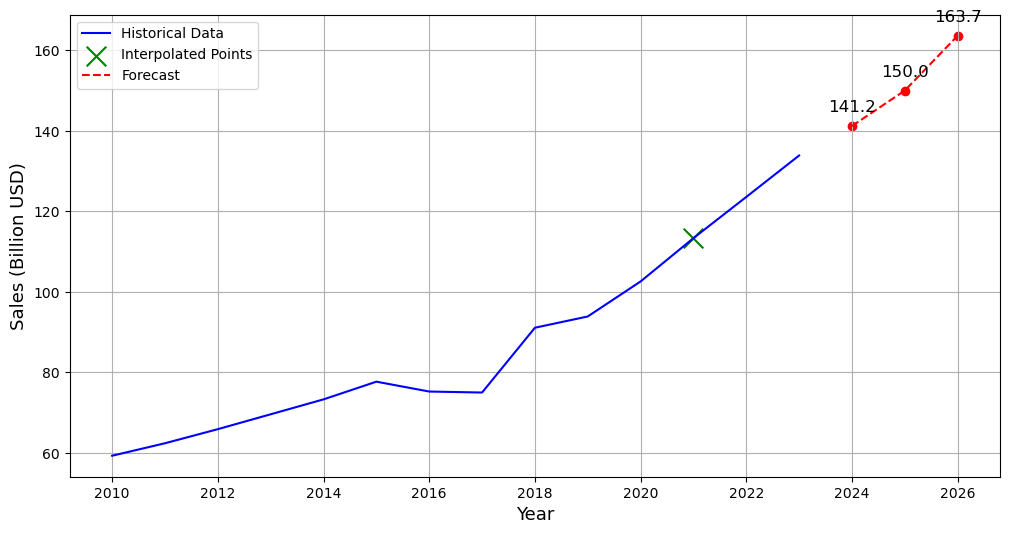


Forecast Results:
Year 2024: 141.2 Billion USD
Year 2025: 150.0 Billion USD
Year 2026: 163.7 Billion USD


In [9]:
from scipy import interpolate
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# 插值处理
def interpolate_missing(data):
    # 创建插值函数
    f = interpolate.interp1d(
        data[data['Sales'].notna()]['Year'], 
        data[data['Sales'].notna()]['Sales'], 
        kind='cubic'
    )
    
    # 对缺失值进行插值
    missing_years = data[data['Sales'].isna()]['Year']
    interpolated_values = f(missing_years)
    data.loc[data['Year'].isin(missing_years), 'Sales'] = interpolated_values
    
    return data, missing_years, interpolated_values

# 进行插值
data, missing_years, interpolated_values = interpolate_missing(data)

print(missing_years, interpolated_values)

# 使用Holt-Winters模型进行预测
def forecast_sales(data, forecast_periods=3):
    # 创建时间序列模型
    model = ExponentialSmoothing(
        data['Sales'],
        seasonal_periods=4,
        trend='add',
        seasonal='add'
    )
    
    # 拟合模型
    fitted_model = model.fit()
    
    # 预测未来值
    forecast = fitted_model.forecast(forecast_periods)
    
    return forecast, fitted_model

# 进行预测
future_years = [2024, 2025, 2026]
forecast, fitted_model = forecast_sales(data)

# 可视化插值和预测结果
plt.figure(figsize=(12, 6))
plt.plot(data['Year'], data['Sales'], 'b-', label='Historical Data')
plt.scatter(missing_years, interpolated_values, color='green', marker='x', s=200, label='Interpolated Points')
plt.plot(future_years, forecast, 'r--', label='Forecast')
plt.scatter(future_years, forecast, color='red')

# 添加预测值标签
for i, year in enumerate(future_years):
    plt.annotate(f'{forecast.iloc[i]:.1f}', 
                (year, forecast.iloc[i]),
                textcoords="offset points", 
                xytext=(0,10), 
                ha='center', fontsize=12)

# plt.title('Pet Food Sales Worldwide: Interpolation and Forecast')
plt.xlabel('Year', fontsize=13)
plt.ylabel('Sales (Billion USD)', fontsize=13)
plt.legend()
plt.grid(True)
plt.show()

# 打印预测结果
print("\nForecast Results:")
for year, value in zip(future_years, forecast):
    print(f"Year {year}: {value:.1f} Billion USD")

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# 计算模型评估指标
actual_values = data['Sales'].values
fitted_values = fitted_model.fittedvalues.values

mse = mean_squared_error(actual_values, fitted_values)
mae = mean_absolute_error(actual_values, fitted_values)
rmse = np.sqrt(mse)
r2 = r2_score(actual_values, fitted_values)

print("\nModel Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.4f}")


Model Performance Metrics:
Mean Squared Error (MSE): 15.19
Root Mean Squared Error (RMSE): 3.90
Mean Absolute Error (MAE): 2.71
R-squared (R²): 0.9705
